In [35]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import json
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [36]:
with open('chatres.json') as content:
    data =json.load(content)
    

In [37]:
tags =[]
patterns = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']]= intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tags.append(intent['tag'])

In [38]:
data1 = pd.DataFrame({"inputs" : patterns, "tags" : tags })

In [39]:
data1

,inputs,tags
0,What to do if Cuts?,Cuts
1,How to cure Cuts?,Cuts
2,Which medicine to apply for Cuts?,Cuts
3,what to apply on cuts?,Cuts
4,Cuts,Cuts
...,...,...
183,How to help a drowning person in CPR?,CPR
184,How do you treat a Fracture?,Fracture
185,what to do if i get a Fracture?,Fracture
186,Which medicine to take if I have a Fracture?,Fracture


In [40]:
import string 
data1['inputs'] = data1['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data1['inputs'] = data1['inputs'].apply(lambda wrd: ''.join(wrd))
data1

,inputs,tags
0,what to do if cuts,Cuts
1,how to cure cuts,Cuts
2,which medicine to apply for cuts,Cuts
3,what to apply on cuts,Cuts
4,cuts,Cuts
...,...,...
183,how to help a drowning person in cpr,CPR
184,how do you treat a fracture,Fracture
185,what to do if i get a fracture,Fracture
186,which medicine to take if i have a fracture,Fracture


In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data1['inputs'])
train = tokenizer.texts_to_sequences(data1['inputs'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data1['tags'])


In [42]:
input_shape= x_train.shape[1]
print(input_shape)

11


In [43]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  131
output length:  44


In [44]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x =  LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model =Model(i,x)



In [46]:
model.compile(loss= "sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [47]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 6ms/step - loss: 3.7859 - accuracy: 0.0106
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 3.7828 - accuracy: 0.0266
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 3.7808 - accuracy: 0.0426
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 3.7786 - accuracy: 0.0479
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 3.7766 - accuracy: 0.0585
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 3.7742 - accuracy: 0.0798
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 3.7715 - accuracy: 0.0851
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 3.7685 - accuracy: 0.1064
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 3.7650 - accuracy: 0.1064
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 3.7605 - accuracy: 0.1117
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 1.3143 - accuracy: 0.8617
Epoch 85/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2913 - accuracy: 0.8564
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2688 - accuracy: 0.8670
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2482 - accuracy: 0.8777
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 1.2281 - accuracy: 0.8777
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 1.2076 - accuracy: 0.8777
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 1.1863 - accuracy: 0.8777
Epoch 91/200
6/6 [==============================] - 0s 10ms/step - loss: 1.1673 - accuracy: 0.8883
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 1.1478 - accuracy: 0.8883
Epoch 93/200
6/6 [==============================] - 0s 4ms/step - loss: 1.1283 - accuracy: 0.8777
Epoch 94/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.9787
Epoch 168/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3856 - accuracy: 0.9840
Epoch 169/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.9894
Epoch 170/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3774 - accuracy: 0.9894
Epoch 171/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3725 - accuracy: 0.9894
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3664 - accuracy: 0.9894
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3622 - accuracy: 0.9947
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3580 - accuracy: 0.9947
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3539 - accuracy: 0.9947
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3502 - accuracy: 0.9947
Epoch 177/200
6/6 [=====

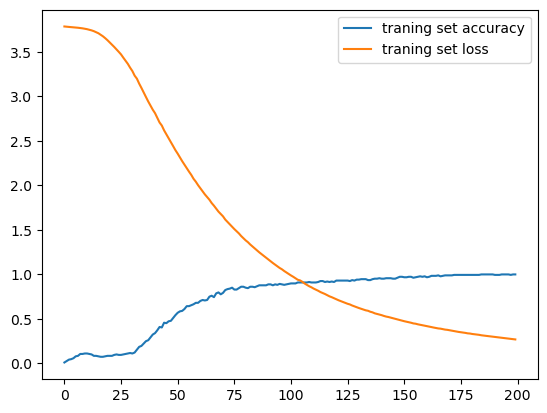

In [48]:
plt.plot(train.history['accuracy'],label='traning set accuracy')
plt.plot(train.history['loss'],label='traning set loss')
plt.legend()